In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

VISUALIZATION OF DATA

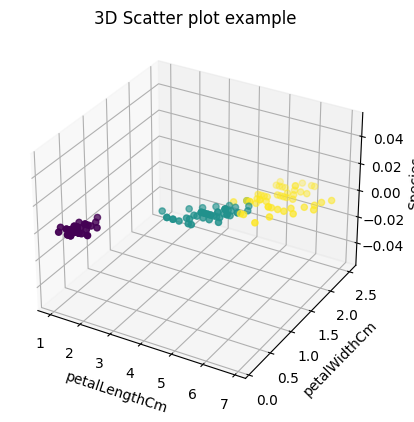

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with columns 'petal_length', 'petal_width', and 'species'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df.petal_length, df.petal_width, c=df.species)

ax.set_xlabel('petalLengthCm')
ax.set_ylabel('petalWidthCm')
ax.set_zlabel('Species')

plt.title('3D Scatter plot example')
plt.show()



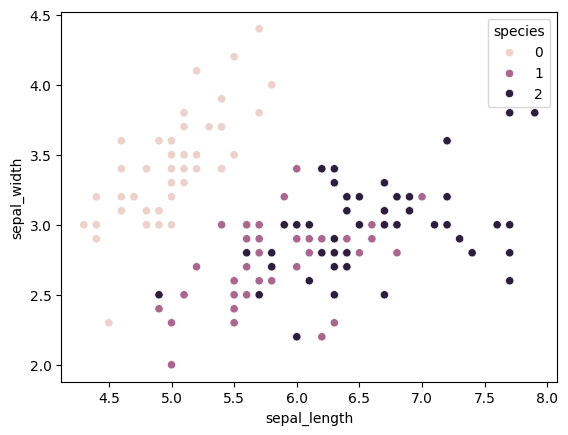

In [7]:
sns.scatterplot(data=df,x="sepal_length",y="sepal_width",hue="species");

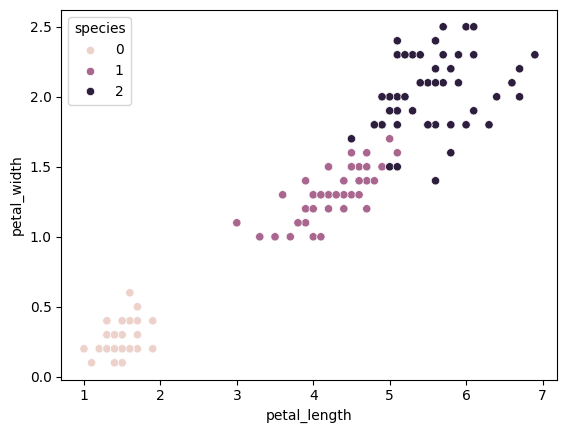

In [8]:
sns.scatterplot(data=df,x="petal_length",y="petal_width",hue="species");

In [9]:
from sklearn.cluster import KMeans

k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal_length', 'petal_width']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

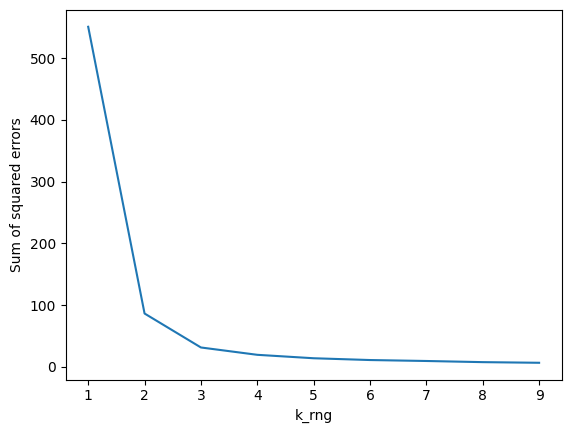

In [10]:
plt.xlabel('k_rng')
plt.ylabel("Sum of squared errors")
plt.plot(k_rng,sse)

In [11]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

km = KMeans(n_clusters=3, random_state=0)


y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

print(y_predicted)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [12]:
df['cluster']=y_predicted
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


ACCURACY:

In [14]:
from sklearn.metrics import confusion_matrix
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
km = KMeans(n_clusters=3, random_state=0)

# Fit the model and make predictions
df['cluster'] = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

# Evaluate the clustering using confusion matrix
cm = confusion_matrix(iris.target, df['cluster'])

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[50  0  0]
 [ 0  2 48]
 [ 0 46  4]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


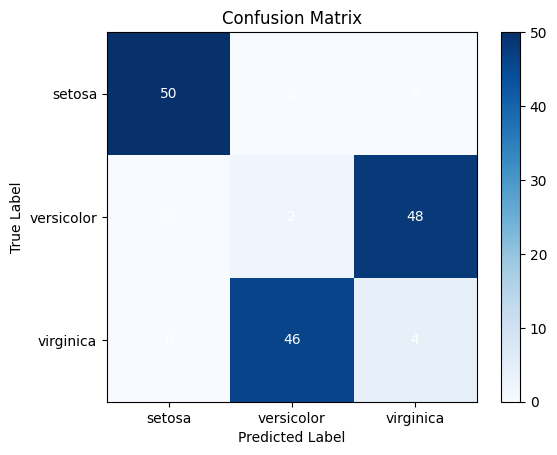

In [15]:
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]  # Adding the true species labels

# Create a label encoder to convert species names to numerical labels
label_encoder = LabelEncoder()
df['species_label'] = label_encoder.fit_transform(df['species'])

# Create a KMeans model with 3 clusters
km = KMeans(n_clusters=3, random_state=0)

# Fit the model and make predictions
df['cluster'] = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

# Evaluate the clustering using confusion matrix
true_labels = df['species_label']
predicted_labels = df['cluster']
cm = confusion_matrix(true_labels, predicted_labels)
class_labels = iris.target_names

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Fill matrix with values
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

